In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# Import Data
adata = sc.read_h5ad('/home/glennrdx/Documents/Research_Project/processed_h5ad/1.2 crypt_enriched_main.h5ad')
adata1 = sc.read_h5ad('/home/glennrdx/Documents/Research_Project/published_reference_material/h5ad_files/2_GSE147319_adata_raw.h5ad')

In [3]:
# Subset to cells where the 'leiden15' annotation starts with 'EE'
adata = adata[adata.obs['leiden15'].str.startswith('EE'), :]

In [4]:
def recluster_subset(adata, annotation_name, cluster_name, new_annotation_name, resolution):
    """
    Recluster a specific subset of cells using Leiden algorithm.

    Parameters:
    -----------
    adata : AnnData
        The AnnData object containing the single-cell data.
    annotation_name : str
        The name of the annotation column to use for subsetting.
    cluster_name : str
        The name of the cluster to recluster.
    new_annotation_name : str
        The name of the new annotation column to store the results.
    resolution : float
        The resolution parameter for the Leiden algorithm.

    Returns:
    --------
    None. The function modifies the adata object in-place.
    """
        # Plot the UMAP before reclustering
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sc.pl.umap(adata, color=[annotation_name], ax=ax1, show=False, title='Before Reclustering - ' + annotation_name, size = 20)

    sc.tl.leiden(adata, restrict_to=(annotation_name, [cluster_name]), 
                 key_added=new_annotation_name, resolution=resolution, random_state=1)
    
    # Plot the UMAP after reclustering
    sc.pl.umap(adata, color=[new_annotation_name], ax=ax2, show=False, title='After Reclustering - ' + new_annotation_name, size = 20)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# recluster_subset(adata, 'EEC_refined_final', 'EE progenitor', 'final_annotations', 0.2)

In [5]:
def combine_clusters(adata, annotation_name, clusters_to_combine):
    """
    Combine specified clusters into one cluster in the given AnnData object and display before and after UMAPs.

    Parameters:
    -----------
    adata : AnnData
        The AnnData object containing the single-cell data.
    annotation_name : str
        The name of the annotation column in adata.obs to be modified.
    clusters_to_combine : list
        List of cluster names to be combined.

    Returns:
    --------
    None. The function modifies the adata object in-place and displays UMAPs.
    """
    # Manually extract the numerical suffix from the annotation name
    annotation_base = annotation_name.rstrip('0123456789')
    annotation_number = annotation_name[len(annotation_base):]

    if annotation_number.isdigit():
        new_annotation_name = annotation_base + str(int(annotation_number) + 1)
    else:
        # Append '0' if the annotation name does not end with a number
        new_annotation_name = annotation_name + '0'

    # Create a new annotation column
    adata.obs[new_annotation_name] = adata.obs[annotation_name].copy()

    # Print the new annotation name
    print(f"New annotation name: {new_annotation_name}")

    # Plot the UMAP before combining clusters
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sc.pl.umap(adata, color=[annotation_name], ax=ax1, show=False, title='Before combining clusters - ' + annotation_name, size=20)

    # Set the target label as the first cluster in the list
    target_label = clusters_to_combine[0]

    # Extract the current cluster labels
    cluster_labels = adata.obs[new_annotation_name]

    # Update cluster labels for the specified clusters
    adata.obs[new_annotation_name] = cluster_labels.apply(lambda x: target_label if x in clusters_to_combine else x)

    # Plot the UMAP after combining clusters
    sc.pl.umap(adata, color=[new_annotation_name], ax=ax2, show=False, title='After combining clusters - ' + new_annotation_name, size=20)

    plt.tight_layout()
    plt.show()


In [6]:
def plot_gene_heatmap_umap(adata, genes, size = 30):
    """
    Plot heatmap UMAPs for a list of genes in an AnnData object.

    Parameters:
    -----------
    adata : AnnData
        The AnnData object containing the single-cell data.
    genes : list
        A list of gene names to plot.

    Returns:
    --------
    None. The function displays the plots.
    """
    num_genes = len(genes)
    fig, axes = plt.subplots(1, num_genes, figsize=(6*num_genes, 6))
    
    if num_genes == 1:
        axes = [axes]
    
    for ax, gene in zip(axes, genes):
        sc.pl.umap(
            adata,
            color=gene,
            title=f'UMAP Heatmap - {gene}',
            frameon=False,
            ax=ax,
            size=size,
            color_map='viridis',
            show=False
        )
        
        ax.set_facecolor('black')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_gene_heatmap_umap(adata, ['Gene1', 'Gene2', 'Gene3'])

## Reclustering the EEC Group

Enteroendocrine (EE) cell types are usually classified based on their hormone production:

1. **L cells**  
   - Hormones: Glucagon-like peptide 1  
   - Markers: *Gcg*

2. **I cells**  
   - Hormones: Cholecystokinin  
   - Markers: *Cck*

3. **Enterochromaffin (EC) cells**  
   - Hormones: Serotonin  
   - Markers: *Tph1*, *Tac1*

4. **X cells**  
   - Hormones: Ghrelin  
   - Markers: *Ghrl*

5. **S cells**  
   - Hormones: Secretin  
   - Markers: *Sec*

6. **K cells**  
   - Hormones: Gastric inhibitory peptide  
   - Markers: *Gip*

7. **Delta cells**  
   - Hormones: Somatostatin  
   - Markers: *Sst*

8. **N cells**  
   - Hormones: Neurotensin  
   - Markers: *Nts*


/home/glennrdx/virtual_envs/.venv/lib/python3.12/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


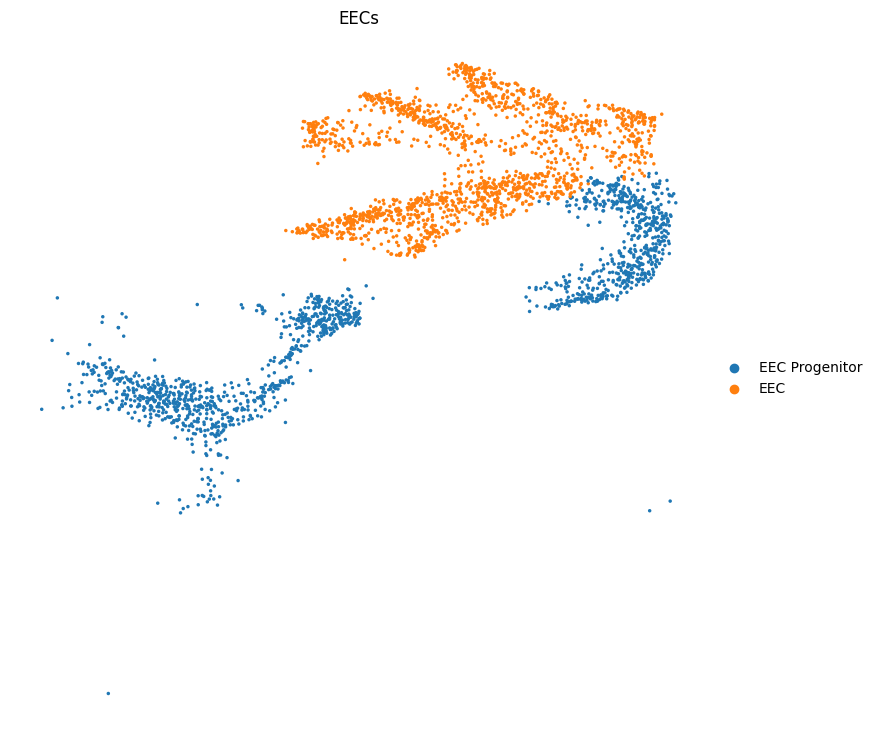

In [7]:
# Plot the UMAP
fig, ax = plt.subplots(figsize=(9, 9))  # Adjust the figsize values as needed

# Plot UMAP on the specified axis
sc.pl.umap(
    adata,
    color=["leiden15"],
    frameon=False,
    size=25,
    ax=ax,
    title = 'EECs'
)

# Show the plot
plt.show()

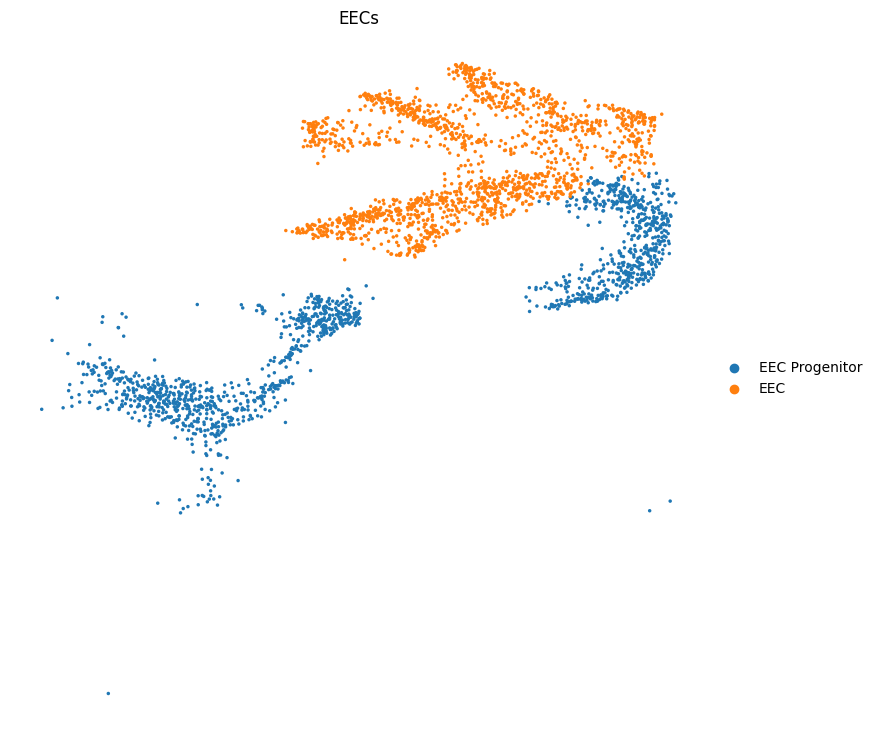

In [8]:
# Plot the UMAP
fig, ax = plt.subplots(figsize=(9, 9))  # Adjust the figsize values as needed

# Plot UMAP on the specified axis
sc.pl.umap(
    adata,
    color=["leiden15"],
    frameon=False,
    size=25,
    ax=ax,
    title = 'EECs'
)

# Show the plot
plt.show()

/tmp/ipykernel_18421/4113620347.py:26: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, restrict_to=(annotation_name, [cluster_name]),


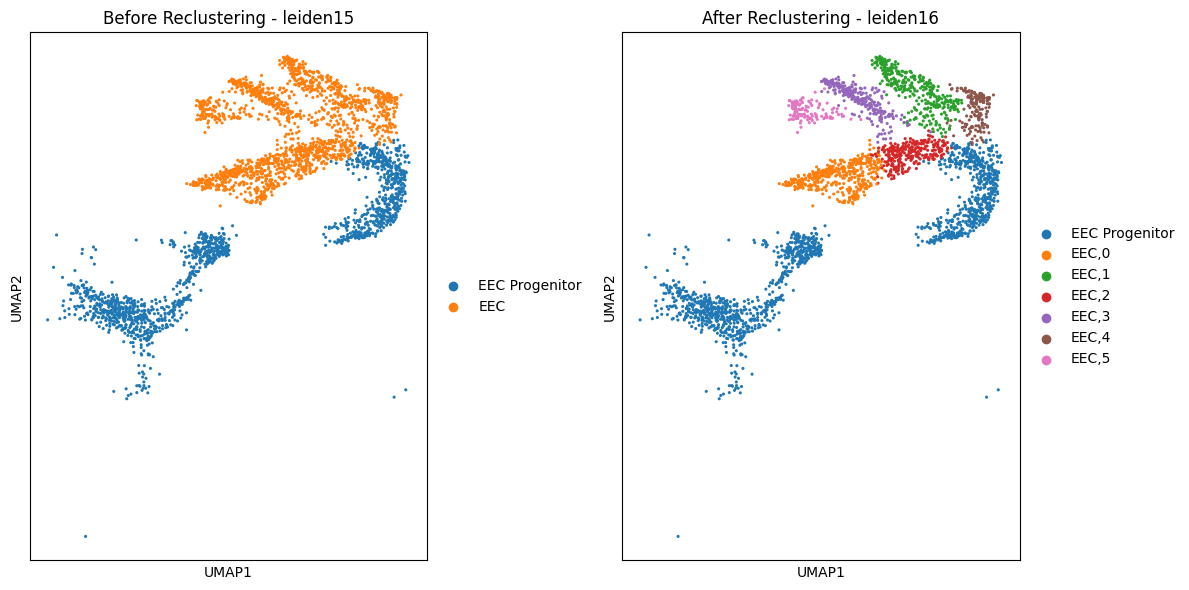

In [9]:
recluster_subset(adata, 'leiden15', 'EEC', 'leiden16', 0.3)

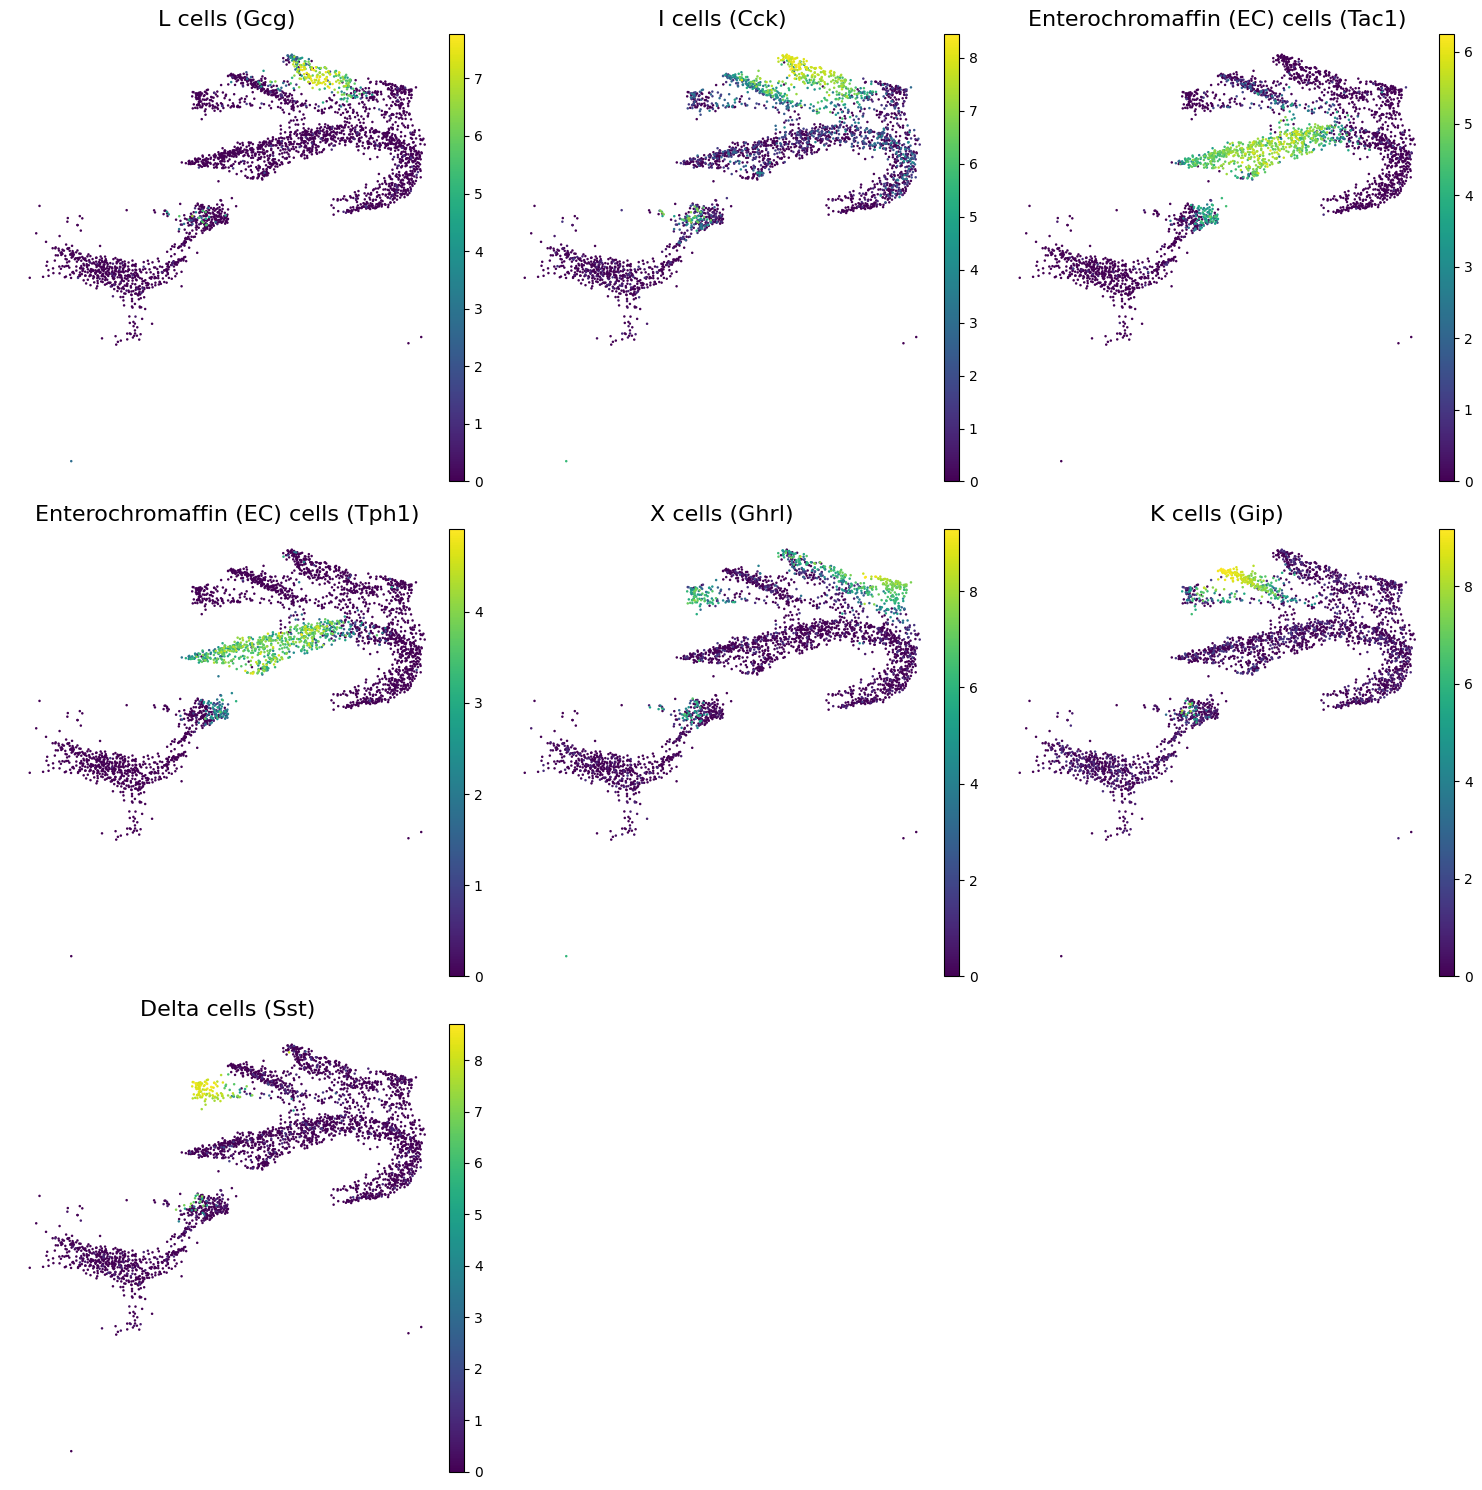

In [10]:
# Plot UMAP marker gene heatmap
marker_genes = ['Gcg', 'Cck', 'Tac1', 'Tph1', 'Ghrl', 'Gip', 'Sst']

marker_titles = {
    'Gcg': 'L cells (Gcg)',
    'Cck': 'I cells (Cck)',
    'Tac1': 'Enterochromaffin (EC) cells (Tac1)',
    'Tph1': 'Enterochromaffin (EC) cells (Tph1)',
    'Ghrl': 'X cells (Ghrl)',
    'Gip': 'K cells (Gip)',
    'Sst': 'Delta cells (Sst)'
}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each marker gene on a separate axis
for i, gene in enumerate(marker_genes):
    sc.pl.umap(
        adata,
        color=gene,
        frameon=False,
        size=13,
        ax=axes[i],
        color_map='viridis',
        show=False
    )
    axes[i].set_title(marker_titles[gene], fontsize=16)

# Remove empty subplots
for j in range(len(marker_genes), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

New annotation name: leiden17


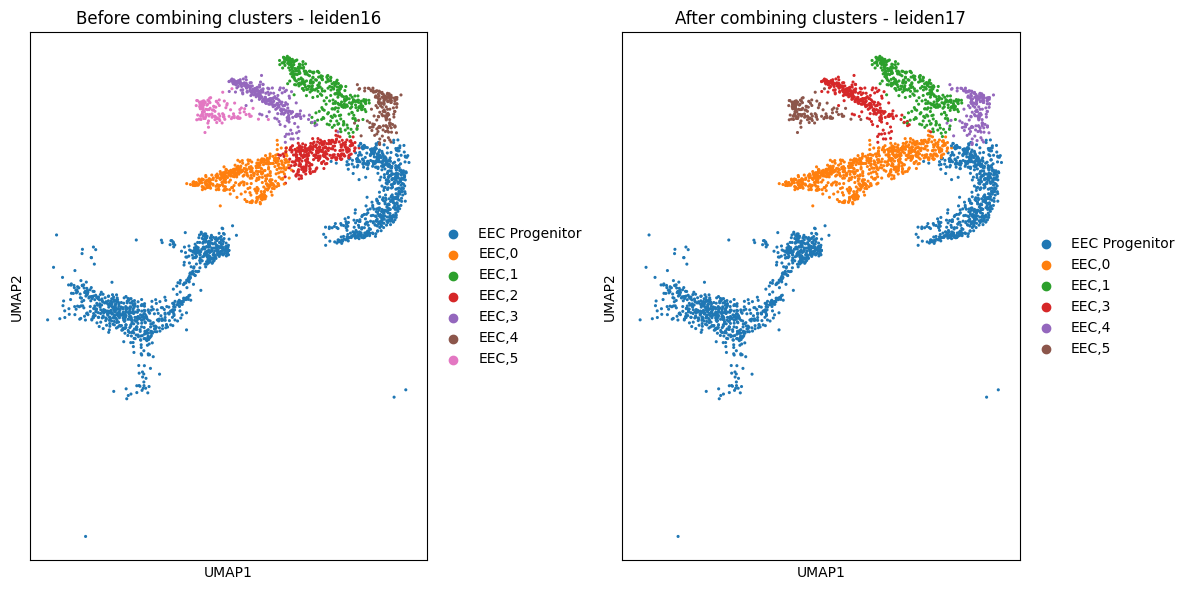

In [11]:
combine_clusters(adata, 'leiden16', ['EEC,0', 'EEC,2'])

In [12]:
# Annotate the newly clustered EEC clusters based off the marker gene heatmap

map1 = {'EEC (I_L)': ['EEC,1'],
        'EEC (EC)': ['EEC,0'],
        'EEC (X)': ['EEC,4'],
        'EEC (K)': ['EEC,3'],
        'EEC (Delta)': ['EEC,5']}

class_map = {v: k for k,vv in map1.items() for v in vv}

adata.obs['EEC_final'] = adata.obs['leiden17']

adata.obs['EEC_final'] = adata.obs['EEC_final'].map(lambda x: class_map.get(x, 'EEC progenitor' if 'EEC' in x else x))

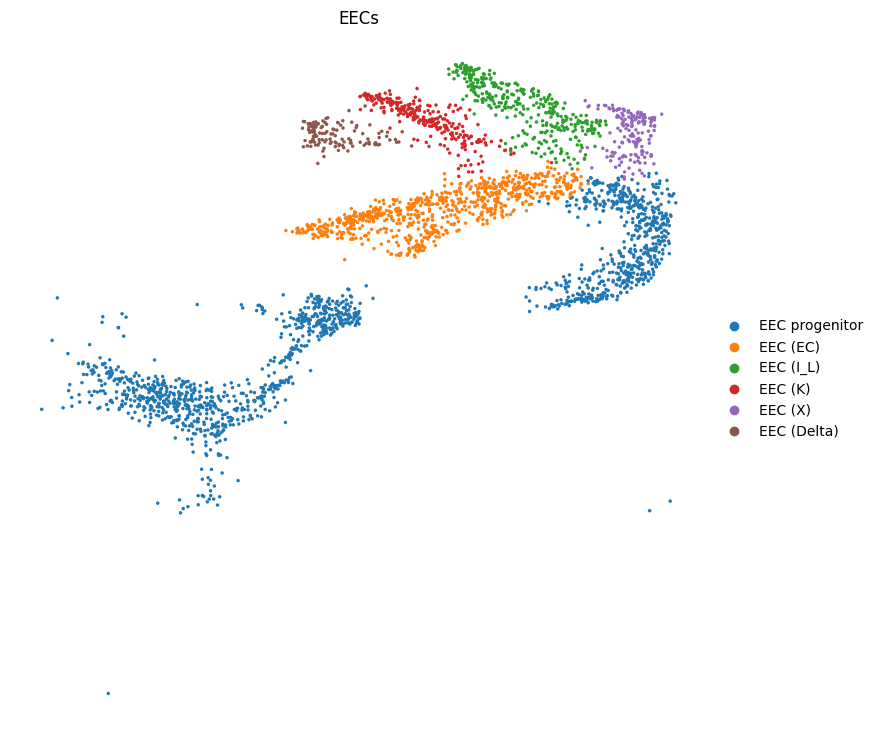

In [13]:
# Plot the UMAP
fig, ax = plt.subplots(figsize=(9, 9))  # Adjust the figsize values as needed

# Plot UMAP on the specified axis
sc.pl.umap(
    adata,
    color=["EEC_final"],
    frameon=False,
    size=25,
    ax=ax,
    title = 'EECs'
)

# Show the plot
plt.show()

## Output H5aD

In [14]:
adata.write('/home/glennrdx/Documents/Research_Project/processed_h5ad/1.3 crypt_enriched_eec.h5ad')

## Cell-type Proportion Plots

/tmp/ipykernel_18421/2248544179.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = adata.obs.groupby(['EEC_final', 'Sample']).size().unstack(fill_value=0)
/tmp/ipykernel_18421/2248544179.py:18: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_proportions = proportions.groupby(proportions.columns, axis=1).mean()
/tmp/ipykernel_18421/2248544179.py:21: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sem_proportions = proportions.groupby(proportions.columns, axis=1).sem()


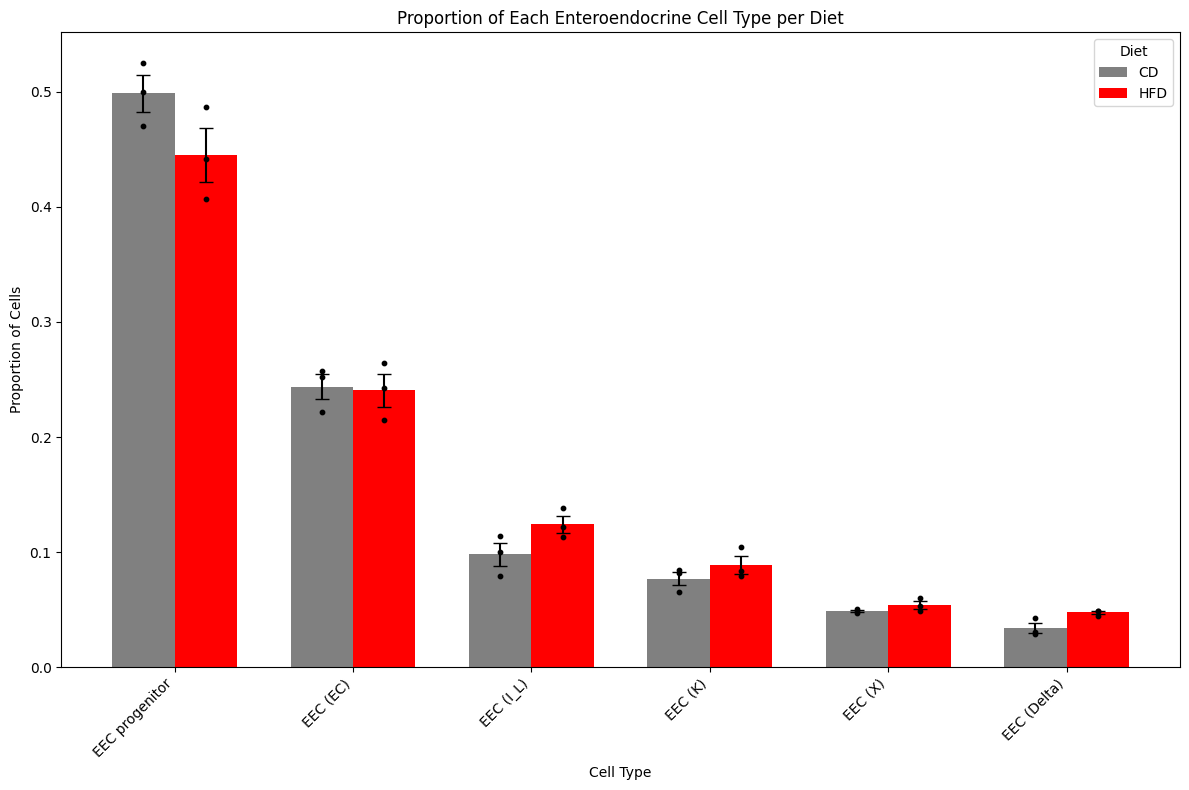

In [15]:
# Group by 'leiden15' and 'Diet', then count occurrences
table = adata.obs.groupby(['EEC_final', 'Sample']).size().unstack(fill_value=0)

# Step 1: Calculate the proportions
proportions = table.div(table.sum(axis=0), axis=1)

# Step 2: Aggregate by diet (mean of the three samples per diet)
diet_mapping = {
    'CD_1': 'CD',
    'CD_2': 'CD',
    'CD_3': 'CD',
    'HFD_1': 'HFD',
    'HFD_2': 'HFD',
    'HFD_3': 'HFD',
}

proportions.columns = proportions.columns.map(diet_mapping)
mean_proportions = proportions.groupby(proportions.columns, axis=1).mean()

# Step 3: Calculate the SEM for each diet and cell type
sem_proportions = proportions.groupby(proportions.columns, axis=1).sem()

# Step 4: Plot the bar plot with error bars
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
x = np.arange(len(mean_proportions.index))

# Define colors for each diet
colors = {'CD': 'grey', 'HFD': 'red'}

# Plot bars with error bars (SEM) and scatter points for each diet
for i, diet in enumerate(mean_proportions.columns):
    ax.bar(x + i * bar_width, mean_proportions[diet], width=bar_width, color=colors[diet], 
           yerr=sem_proportions[diet], capsize=5, label=diet)
    
    # Plot individual sample points for each diet
    for j, cell_type in enumerate(mean_proportions.index):
        # Extract the proportions for this specific cell type and diet
        sample_values = proportions.loc[cell_type, proportions.columns == diet]
        ax.scatter(np.full(sample_values.shape, x[j] + i * bar_width), sample_values, color='black', s=10, zorder=3)

# Adding labels and title
ax.set_xlabel('Cell Type')
ax.set_ylabel('Proportion of Cells')
ax.set_title('Proportion of Each Enteroendocrine Cell Type per Diet')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(mean_proportions.index, rotation=45, ha='right')
ax.legend(title='Diet')

plt.tight_layout()
plt.show()

## DGE

In [16]:
# # Define the directory path where the CSVs will be saved
# output_dir = "/home/glennrdx/Documents/Research_Project/scRNAseq-MSc-Analysis/upstream_analysis/crypt/differential_expression_scanpy/EEC"

# # Ensure the directory exists (create it if it doesn't)
# os.makedirs(output_dir, exist_ok=True)

# # Get the unique cluster identifiers
# EEC_final = adata.obs['EEC_final'].unique()
# print(EEC_final)

# # Perform differential expression analysis for each cluster
# for cluster in EEC_final:

#     # Subset the data for the cluster
#     adata_cluster = adata[adata.obs['EEC_final'] == cluster].copy()

#     # Perform differential expression between Diet conditions
#     sc.tl.rank_genes_groups(adata_cluster, groupby='Diet', method='wilcoxon')  # or 'wilcoxon', 'logreg', etc.

#     # Store the results
#     result = adata_cluster.uns['rank_genes_groups']

#     # Unpack the results
#     genes = result['names']
#     pvals = result['pvals']
#     pvals_adj = result['pvals_adj']
#     logfoldchanges = result['logfoldchanges']

#     # Define the comparison index for the second value
#     comparison_index = 1  # Adjust if needed for different comparisons

#     # Flatten the tuples and create the DataFrame
#     flat_results = []
#     for i in range(len(genes)):
#         if comparison_index < len(genes[i]):  # Check if the comparison index exists
#             logfc_value = logfoldchanges[i][comparison_index]
#             pval = pvals[i][comparison_index]
#             pval_adj = pvals_adj[i][comparison_index]

#             flat_results.append({
#                 '': genes[i][comparison_index],
#                 'logFC': logfc_value,
#                 'AveExpr': np.nan,
#                 't': np.nan,
#                 'P.Value': pval,
#                 'adj.P.Val': pval_adj,
#                 'B': np.nan,
#                 'abs.log2FC': logfc_value,
#             })

#     # Convert to DataFrame
#     df = pd.DataFrame(flat_results)

#     # Remove duplicate genes (keeping the first occurrence)
#     df_unique = df.drop_duplicates(subset='', keep='first')

#     # Define the file path for the current cluster
#     file_path = os.path.join(output_dir, f'diff_exp_CD_vs_HFD_{cluster}.csv')
    
#     # Save the DataFrame to a CSV file with the specified format
#     df_unique.to_csv(file_path, index=False)
    
#     print(f"Saved results for cluster {cluster} to {file_path}")
